<a href="https://colab.research.google.com/github/AtosLessio/lia1_2024_1/blob/main/Entregas%20-%20Atos%20L%C3%A9ssio/Case%20Arrecada%C3%A7%C3%A3o%20por%20UF/Ci%C3%AAncia%20de%20Dados%20-%20Case%20Arrecada%C3%A7%C3%A3o%20de%20Impostos/Ci%C3%AAncia_de_dados_Case_Super_Store.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Ciência de Dados - Case Arrecadação de Impostos por UF** 🧢

O Case Arrecadação de Impostos por UF apresenta um dataset com valores de impostos arrecadados no Brasil, entre os anos de 2000 e 2024, com aproximadamente 7.800 registros e 10 colunas de informações.

**Serão 6 perguntas e 4 desafios! #borafazer**

In [307]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [308]:
# Função para formatar valor monetário para o padrão brasileiro
def formatar_moeda(valor):
    return f'R$ {valor:,.2f}'.replace(',', '*').replace('.', ',').replace('*', '.')


**Carregando os dados**

In [309]:
# Carrega o dataset
impostos_uf = pd.read_csv('https://raw.githubusercontent.com/AtosLessio/lia1_2024_1/main/Entregas%20-%20Atos%20L%C3%A9ssio/Case%20Arrecada%C3%A7%C3%A3o%20por%20UF/Arrecada%C3%A7%C3%A3o-por-UF-4.csv')

In [310]:
# Shape
impostos_uf.shape

(7830, 10)

In [311]:
# Amostra dos dados
impostos_uf.head()

,Ano,Mes,UF,IMPOSTO SOBRE IMPORTACAO,IMPOSTO SOBRE EXPORTACAO,IPI - FUMO,IPI - BEBIDAS,IPI - AUTOMOVEIS,IPI - VINCULADO IMPORTACAO,IPI - OUTROS
0,2000,Janeiro,AC,231,0,292.096,0,0,167,1.558
1,2000,Janeiro,AL,475.088,33.873,1.329.338,812.470,0,141.735,3.676.847
2,2000,Janeiro,AM,11.679.405,0,1.507.146,1.791.471,27.796,4.414.483,1.800.346
3,2000,Janeiro,AP,24.267,0,424.862,1.419,321,22.333,12.165
4,2000,Janeiro,BA,10.476.457,13,5.542.123,11.533.707,0,7.496.476,23.743.858


In [312]:
# Amostra dos dados
impostos_uf.tail()

,Ano,Mes,UF,IMPOSTO SOBRE IMPORTACAO,IMPOSTO SOBRE EXPORTACAO,IPI - FUMO,IPI - BEBIDAS,IPI - AUTOMOVEIS,IPI - VINCULADO IMPORTACAO,IPI - OUTROS
7825,2024,Fevereiro,RR,291.272,0,0,0,10.900,89.410,74.005
7826,2024,Fevereiro,SC,1.138.075.792,11.532,0,12.013.426,20.099.350,419.886.236,295.827.339
7827,2024,Fevereiro,SP,1.618.983.126,-153.869,2.511.347,59.024.403,190.801.851,517.117.088,1.153.454.774
7828,2024,Fevereiro,SE,5.950.794,-74,551.737,2.419.364,0,799.472,6.795.754
7829,2024,Fevereiro,TO,5.952.163,0,0,2.797,0,2.485.472,1.189.319


**Análise exploratória**

In [313]:
# Colunas do conjunto de dados
impostos_uf.columns

Index(['Ano', 'Mes', 'UF', 'IMPOSTO SOBRE IMPORTACAO',
       'IMPOSTO SOBRE EXPORTACAO', 'IPI - FUMO', 'IPI - BEBIDAS',
       'IPI - AUTOMOVEIS', 'IPI - VINCULADO  IMPORTACAO', 'IPI - OUTROS'],
      dtype='object')

In [314]:
# Verificando o tipo de dado de cada coluna
impostos_uf.dtypes

Ano                             int64
Mes                            object
UF                             object
IMPOSTO SOBRE IMPORTACAO       object
IMPOSTO SOBRE EXPORTACAO       object
IPI - FUMO                     object
IPI - BEBIDAS                  object
IPI - AUTOMOVEIS               object
IPI - VINCULADO  IMPORTACAO    object
IPI - OUTROS                   object
dtype: object

In [315]:
# Verificando se há registros duplicados
impostos_uf[impostos_uf.duplicated()]

,Ano,Mes,UF,IMPOSTO SOBRE IMPORTACAO,IMPOSTO SOBRE EXPORTACAO,IPI - FUMO,IPI - BEBIDAS,IPI - AUTOMOVEIS,IPI - VINCULADO IMPORTACAO,IPI - OUTROS


In [316]:
# Verificando de há valores ausentes
impostos_uf.isnull().sum()

Ano                            0
Mes                            0
UF                             0
IMPOSTO SOBRE IMPORTACAO       0
IMPOSTO SOBRE EXPORTACAO       0
IPI - FUMO                     0
IPI - BEBIDAS                  0
IPI - AUTOMOVEIS               0
IPI - VINCULADO  IMPORTACAO    0
IPI - OUTROS                   0
dtype: int64

## **1. Qual UF com maior valor de impostos sobre importação?**

In [343]:
# Removendo os pontos dos valores na coluna 'IMPOSTO SOBRE IMPORTACAO' e convertendo para float
impostos_uf['IMPOSTO SOBRE IMPORTACAO'] = impostos_uf['IMPOSTO SOBRE IMPORTACAO'].astype(str).str.replace('.', '').astype(float)


In [344]:
# Agrupando por UF e somando o imposto sobre importação
total_por_uf = impostos_uf.groupby('UF')['IMPOSTO SOBRE IMPORTACAO'].sum()


In [325]:
# Classificar os valores em ordem decrescente
importacao_uf = importacao_uf.sort_values(ascending=False)


In [347]:
# Formatando o valor como moeda
maior_total_formatado = formatar_moeda(maior_total)

print(f"A UF com maior total de impostos sobre importação é {uf_maior_total} com um total de {maior_total_formatado}.")

A UF com maior total de impostos sobre importação é SP com um total de R$ 3.147.274.574.250,00.


## **2. Qual o total de impostos sobre exportação por ano?**
Apresente o resultado em um gráfico de barras.

In [198]:
# Converter a coluna 'IMPOSTO SOBRE EXPORTACAO' para o tipo numérico
impostos_uf['IMPOSTO SOBRE EXPORTACAO'] = pd.to_numeric(impostos_uf['IMPOSTO SOBRE EXPORTACAO'], errors='coerce')


In [199]:
# Agrupar os dados por ano e somar os valores de impostos sobre exportação
exportacao_por_ano = impostos_uf.groupby('Ano')['IMPOSTO SOBRE EXPORTACAO'].sum()

In [200]:
exportacao_por_ano.head()

Ano
2000    16656.376
2001    36726.788
2002    37407.000
2003    35172.901
2004    24150.643
Name: IMPOSTO SOBRE EXPORTACAO, dtype: float64

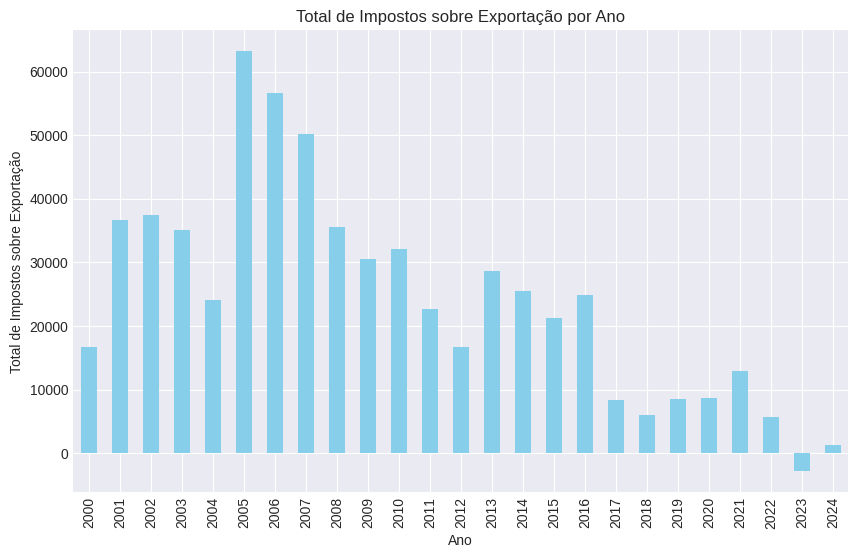

In [201]:
# Plot
exportacao_por_ano.plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.title('Total de Impostos sobre Exportação por Ano')
plt.xlabel('Ano')
plt.ylabel('Total de Impostos sobre Exportação')
plt.show()

## **3. Qual o total de impostos sobre exportação por UF?**

Apresente o resultado em um gráfico de barras.

In [202]:
# Agrupar os dados por estado e somar os valores de impostos sobre exportação
exportacao_por_uf = impostos_uf.groupby('UF')['IMPOSTO SOBRE EXPORTACAO'].sum()


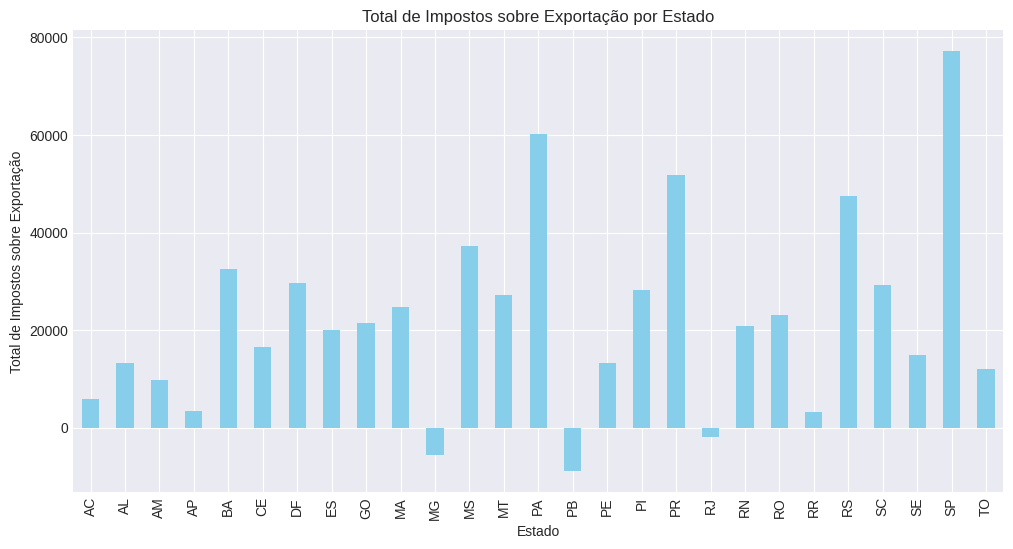

In [203]:
# Plotar o total de impostos sobre exportação por estado em um gráfico de barras
exportacao_por_uf.plot(kind='bar', figsize=(12, 6), color='skyblue')
plt.title('Total de Impostos sobre Exportação por Estado')
plt.xlabel('Estado')
plt.ylabel('Total de Impostos sobre Exportação')
plt.show()

## **4. Quais são as 10 UF's com maior valor de IPI sobre automóveis?**

Apresente o resultado em um gráfico de barras.

In [204]:
# Converter a coluna 'IPI - AUTOMOVEIS' para o tipo numérico
impostos_uf['IPI - AUTOMOVEIS'] = pd.to_numeric(impostos_uf['IPI - AUTOMOVEIS'], errors='coerce')

In [205]:
# Agrupar por UF e somar o IPI sobre automóveis
ipi_automoveis_por_uf =impostos_uf.groupby('UF')['IPI - AUTOMOVEIS'].sum()

In [206]:
# Ordenar em ordem decrescente e pegar as 10 maiores UF
top_10_uf = ipi_automoveis_por_uf.nlargest(10)

In [207]:
top_10_uf.head(10)

UF
PE    23436.933
RO    18358.515
RN    15472.718
AP    14972.160
CE    14879.998
ES    14875.608
GO    13769.634
AM    11821.400
SC    11599.727
RR     5459.339
Name: IPI - AUTOMOVEIS, dtype: float64

<ipython-input-208-36dd748950c2>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_uf.values, y=top_10_uf.index, palette="viridis")


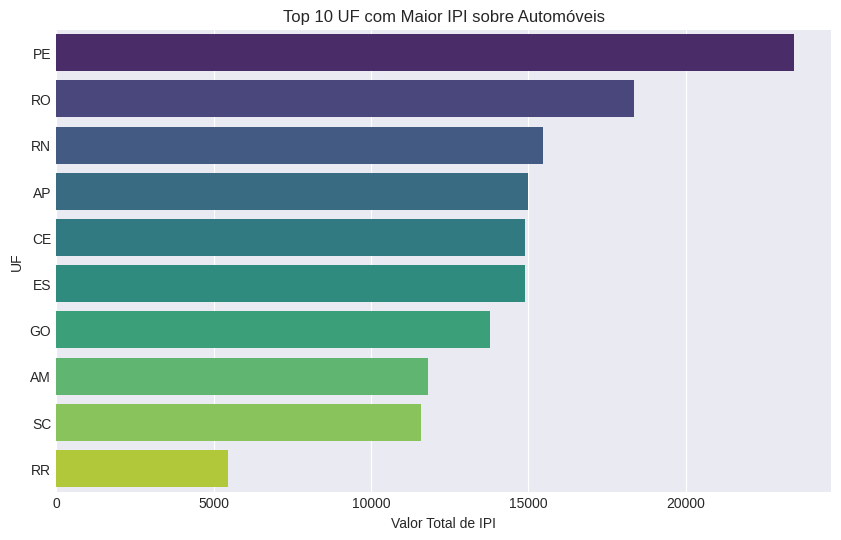

In [208]:
# Criar o gráfico de barras horizontais
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_uf.values, y=top_10_uf.index, palette="viridis")
plt.title('Top 10 UF com Maior IPI sobre Automóveis')
plt.xlabel('Valor Total de IPI')
plt.ylabel('UF')
plt.show()

## **5. Como foi a evolução temporal dos impostos sobre importação e exportação?**

Apresente o resultado em um gráfico de linha.

In [209]:
# Converter a coluna 'Ano' para o tipo inteiro
impostos_uf['Ano'] = pd.to_numeric(impostos_uf['Ano'], errors='coerce')


In [210]:
# Calcular a soma dos impostos sobre importação e exportação para cada ano
impostos_por_ano = impostos_uf.groupby('Ano')[['IMPOSTO SOBRE IMPORTACAO', 'IMPOSTO SOBRE EXPORTACAO']].sum()

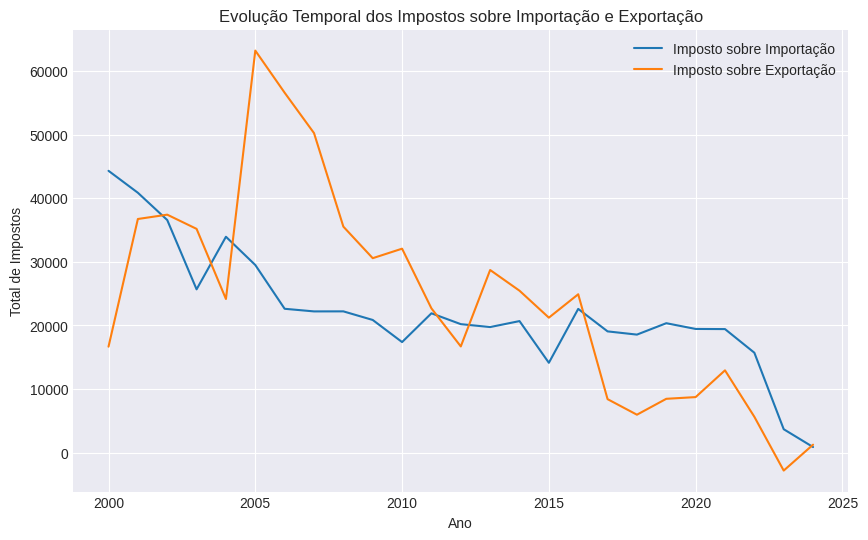

In [211]:
# Plotar um gráfico de linha para mostrar a evolução temporal dos impostos sobre importação e exportação
impostos_por_ano.plot(kind='line', figsize=(10, 6))
plt.title('Evolução Temporal dos Impostos sobre Importação e Exportação')
plt.xlabel('Ano')
plt.ylabel('Total de Impostos')
plt.legend(['Imposto sobre Importação', 'Imposto sobre Exportação'])
plt.show()

## **6. Qual o total de impostos sobre importação e exportação por ano?**

In [212]:
impostos_uf.head()

,Ano,Mes,UF,IMPOSTO SOBRE IMPORTACAO,IMPOSTO SOBRE EXPORTACAO,IPI - FUMO,IPI - BEBIDAS,IPI - AUTOMOVEIS,IPI - VINCULADO IMPORTACAO,IPI - OUTROS
0,2000,Janeiro,AC,231.000,0.000,292.096,0,0.000,167,1.558
1,2000,Janeiro,AL,475.088,33.873,1.329.338,812.470,0.000,141.735,3.676.847
2,2000,Janeiro,AM,NaN,0.000,1.507.146,1.791.471,27.796,4.414.483,1.800.346
3,2000,Janeiro,AP,24.267,0.000,424.862,1.419,321.000,22.333,12.165
4,2000,Janeiro,BA,NaN,13.000,5.542.123,11.533.707,0.000,7.496.476,23.743.858


In [213]:
# Converter a coluna 'Ano' para o tipo inteiro
impostos_uf['Ano'] = pd.to_numeric(impostos_uf['Ano'], errors='coerce')

In [214]:
# Calcular a soma dos impostos sobre importação e exportação para cada ano
total_por_ano = impostos_uf.groupby('Ano')[['IMPOSTO SOBRE IMPORTACAO', 'IMPOSTO SOBRE EXPORTACAO']].sum()

In [215]:
# Aplicar a formatação monetária aos valores totais
total_por_ano_formatado = total_por_ano.applymap(formatar_moeda)

In [216]:
# Apresentar o total de impostos de importação e exportação por ano
print("Total de Impostos de Importação e Exportação por Ano:")
print(total_por_ano_formatado)

Total de Impostos de Importação e Exportação por Ano:
     IMPOSTO SOBRE IMPORTACAO IMPOSTO SOBRE EXPORTACAO
Ano                                                   
2000             R$ 44.300,39             R$ 16.656,38
2001             R$ 40.849,26             R$ 36.726,79
2002             R$ 36.566,00             R$ 37.407,00
2003             R$ 25.668,06             R$ 35.172,90
2004             R$ 33.935,20             R$ 24.150,64
2005             R$ 29.494,06             R$ 63.201,35
2006             R$ 22.611,65             R$ 56.576,01
2007             R$ 22.199,33             R$ 50.229,08
2008             R$ 22.205,97             R$ 35.525,64
2009             R$ 20.854,67             R$ 30.565,58
2010             R$ 17.377,82             R$ 32.059,92
2011             R$ 21.902,03             R$ 22.674,33
2012             R$ 20.195,52             R$ 16.692,60
2013             R$ 19.738,65             R$ 28.708,40
2014             R$ 20.677,93             R$ 25.455,96
2015       

## **Desafio 1 - Nível Júnior**

Qual foi o mês com maior total de impostos sobre importação no ano de 2023?

In [217]:
# Filtrar os dados para o ano de 2023
dados_2023 = impostos_uf[impostos_uf['Ano'] == 2023]

In [218]:
# Calcular o total de impostos sobre importação para cada mês em 2023
total_por_mes_2023 = dados_2023.groupby('Mes')['IMPOSTO SOBRE IMPORTACAO'].sum()

In [219]:
# Encontrar o mês com o maior valor total de impostos sobre importação em 2023
mes_maior_valor = total_por_mes_2023.idxmax()
maior_valor = total_por_mes_2023.max()

# Formatando o maior valor em formato monetário
maior_valor_formatado = formatar_moeda(maior_valor)


print(f"O mês com o maior valor total de impostos sobre importação em 2023 foi '{mes_maior_valor}' com um total de {maior_valor_formatado}.")

O mês com o maior valor total de impostos sobre importação em 2023 foi 'Setembro' com um total de R$ 779,86.


## **Desafio 2 - Nível Master**

Mostre a evolução temporal e distribuição espacial de impostos sobre importação.

In [220]:
# Preparação dos dados
# Converter a coluna 'Ano' para o tipo inteiro
impostos_uf['Ano'] = pd.to_numeric(impostos_uf['Ano'], errors='coerce')

In [221]:
# Análise Temporal
# Calcular a soma dos impostos sobre importação para cada ano
total_por_ano = impostos_uf.groupby('Ano')['IMPOSTO SOBRE IMPORTACAO'].sum()

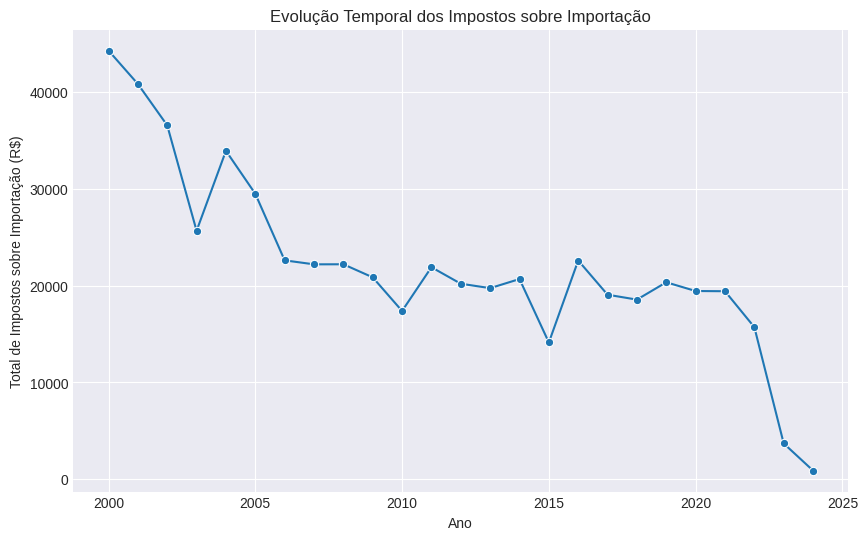

In [222]:
# Plotar um gráfico de linha para mostrar a evolução temporal dos impostos sobre importação
plt.figure(figsize=(10, 6))
sns.lineplot(x=total_por_ano.index, y=total_por_ano.values, marker='o')
plt.title('Evolução Temporal dos Impostos sobre Importação')
plt.xlabel('Ano')
plt.ylabel('Total de Impostos sobre Importação (R$)')
plt.grid(True)
plt.show()

In [223]:
# Análise Espacial
# Calcular a soma dos impostos sobre importação para cada estado
total_por_estado = impostos_uf.groupby('UF')['IMPOSTO SOBRE IMPORTACAO'].sum()

In [224]:
# Ordenar os estados pelo total de impostos sobre importação
total_por_estado = total_por_estado.sort_values(ascending=False)

<ipython-input-225-7c84dffbe272>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=total_por_estado.values, y=total_por_estado.index, palette='viridis')


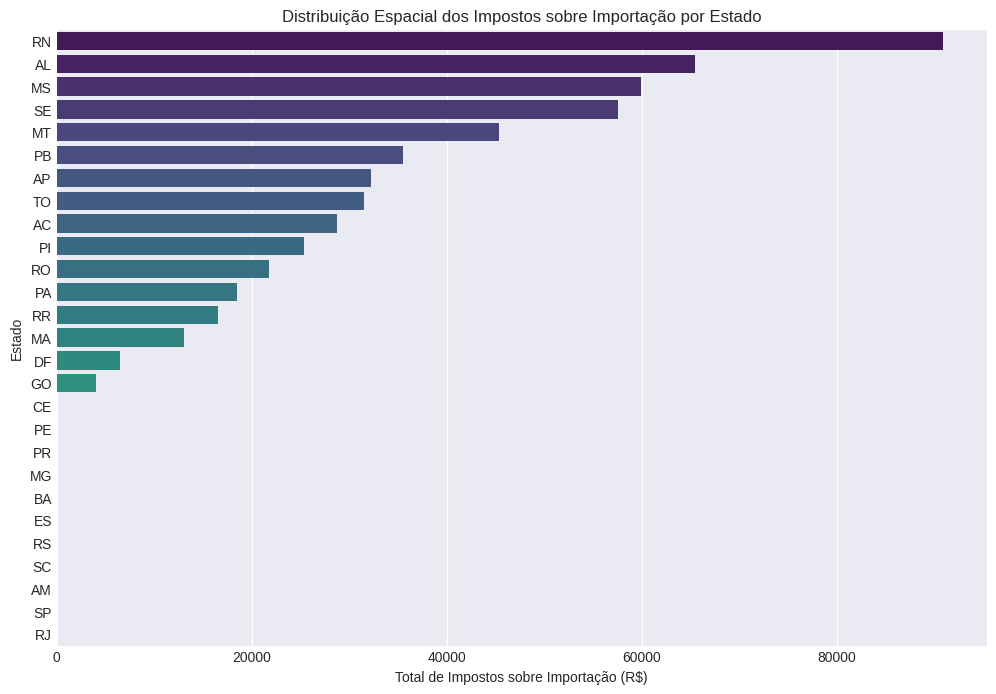

In [225]:
# Plotar um gráfico de barras para mostrar a distribuição espacial dos impostos sobre importação por estado
plt.figure(figsize=(12, 8))
sns.barplot(x=total_por_estado.values, y=total_por_estado.index, palette='viridis')
plt.title('Distribuição Espacial dos Impostos sobre Importação por Estado')
plt.xlabel('Total de Impostos sobre Importação (R$)')
plt.ylabel('Estado')
plt.grid(True, axis='x')
plt.show()

In [226]:
# Calcular a soma dos impostos sobre importação para cada ano e estado
total_por_ano_estado = impostos_uf.groupby(['Ano', 'UF'])['IMPOSTO SOBRE IMPORTACAO'].sum().unstack()


<Figure size 1200x800 with 0 Axes>

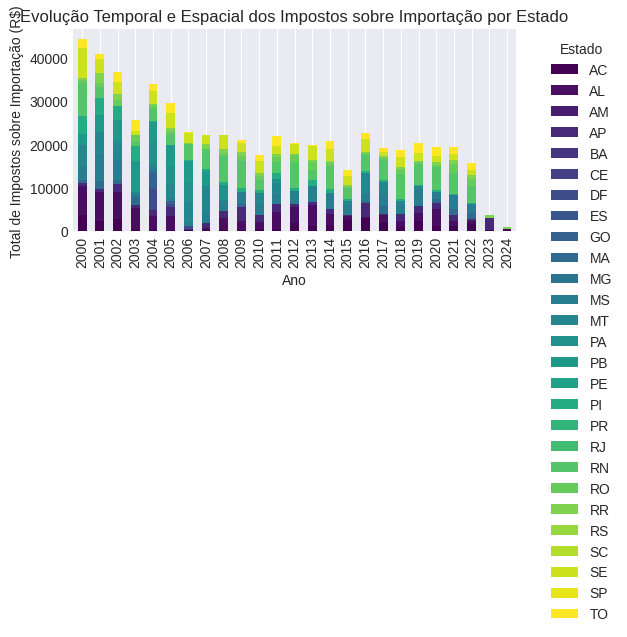

In [227]:
# Plotar um gráfico de barras empilhadas para mostrar a evolução temporal e espacial dos impostos sobre importação
plt.figure(figsize=(12, 8))
total_por_ano_estado.plot(kind='bar', stacked=True, cmap='viridis')
plt.title('Evolução Temporal e Espacial dos Impostos sobre Importação por Estado')
plt.xlabel('Ano')
plt.ylabel('Total de Impostos sobre Importação (R$)')
plt.legend(title='Estado', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

## **Desafio 3 - Nível Master Ninja**

Qual a média de vendas por segmento, por ano e por mês?

Apresente o resultado em um gráfico de linha.

In [335]:
# Convertendo a coluna 'IMPOSTO SOBRE IMPORTACAO' para o tipo numérico
impostos_uf['IMPOSTO SOBRE IMPORTACAO'] = impostos_uf['IMPOSTO SOBRE IMPORTACAO'].str.replace('.', '').astype(float)



In [336]:
# Convertendo a coluna 'Ano' para o tipo correto (int)
impostos_uf['Ano'] = impostos_uf['Ano'].astype(int)


In [337]:
# Agrupando os dados por ano e mês e calculando a média do imposto sobre importação
media_por_ano_mes = impostos_uf.groupby(['Ano', 'Mes'])['IMPOSTO SOBRE IMPORTACAO'].mean().reset_index()


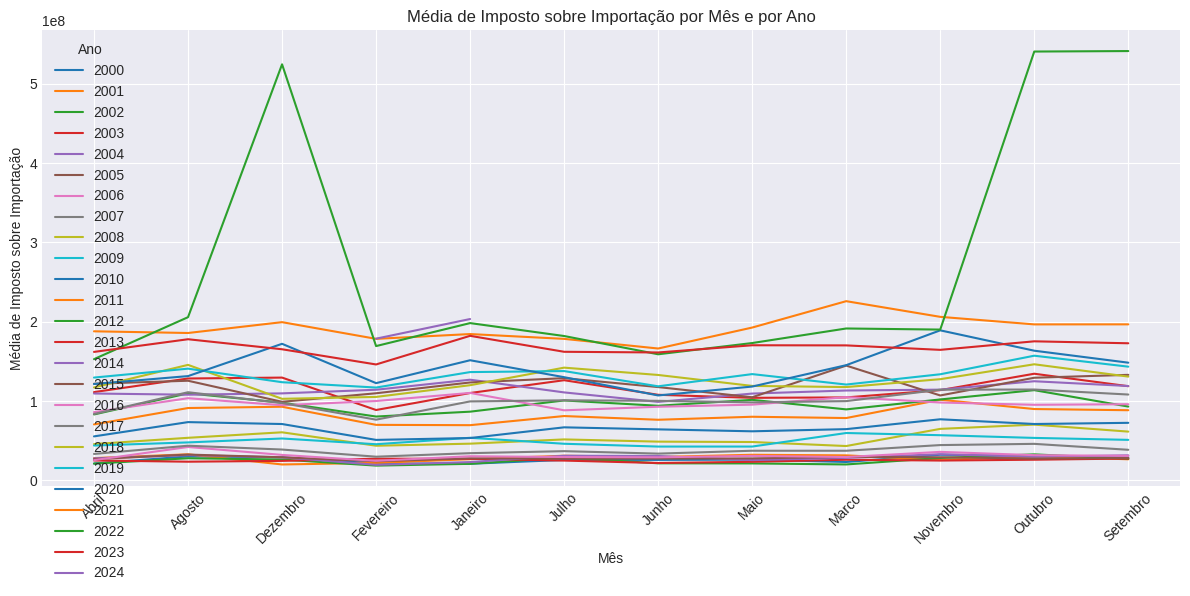

In [340]:
# Criando o gráfico
plt.figure(figsize=(12, 6))
for ano in media_por_ano_mes['Ano'].unique():
    dados_ano = media_por_ano_mes[media_por_ano_mes['Ano'] == ano]
    plt.plot(dados_ano['Mes'], dados_ano['IMPOSTO SOBRE IMPORTACAO'], label=ano)

plt.title('Média de Imposto sobre Importação por Mês e por Ano')
plt.xlabel('Mês')
plt.ylabel('Média de Imposto sobre Importação')
plt.legend(title='Ano', loc='upper left')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

## **Desafio 4 - Nível Master Ninja das Galáxias**
Qual a média dos valores de IPI para no ano de 2023, para o estado de Goiás?

In [348]:
# Filtrando os dados para incluir apenas Goiás em 2023
ipi_goiás_2023 = impostos_uf[(impostos_uf['UF'] == 'GO') & (impostos_uf['Ano'] == 2023)]


In [349]:
# Selecionar todas as colunas de IPI
colunas_ipi = ['IPI - FUMO', 'IPI - BEBIDAS', 'IPI - AUTOMOVEIS', 'IPI - VINCULADO  IMPORTACAO', 'IPI - OUTROS']


In [350]:
# Converter as colunas para o tipo string e remover os pontos dos valores
for coluna in colunas_ipi:
    impostos_go[coluna] = impostos_go[coluna].astype(str).str.replace('.', '')

In [351]:
# Converter para float
impostos_go[colunas_ipi] = impostos_go[colunas_ipi].astype(float)


In [356]:
# Calcular a média dos valores de IPI para cada coluna
media_ipi_go_2023 = impostos_go[colunas_ipi].mean()


In [357]:
# Formatar os valores de forma monetária
media_ipi_go_formatado = media_ipi_go.apply(formatar_moeda)

print("Médias dos valores de IPI para o estado de Goiás:")
print(media_ipi_go_formatado)

Médias dos valores de IPI para o estado de Goiás:
IPI - FUMO                     R$ 186.668.744,83
IPI - BEBIDAS                  R$ 670.366.974,14
IPI - AUTOMOVEIS                 R$ 1.271.331,48
IPI - VINCULADO  IMPORTACAO    R$ 154.398.976,45
IPI - OUTROS                   R$ 161.762.816,38
dtype: object


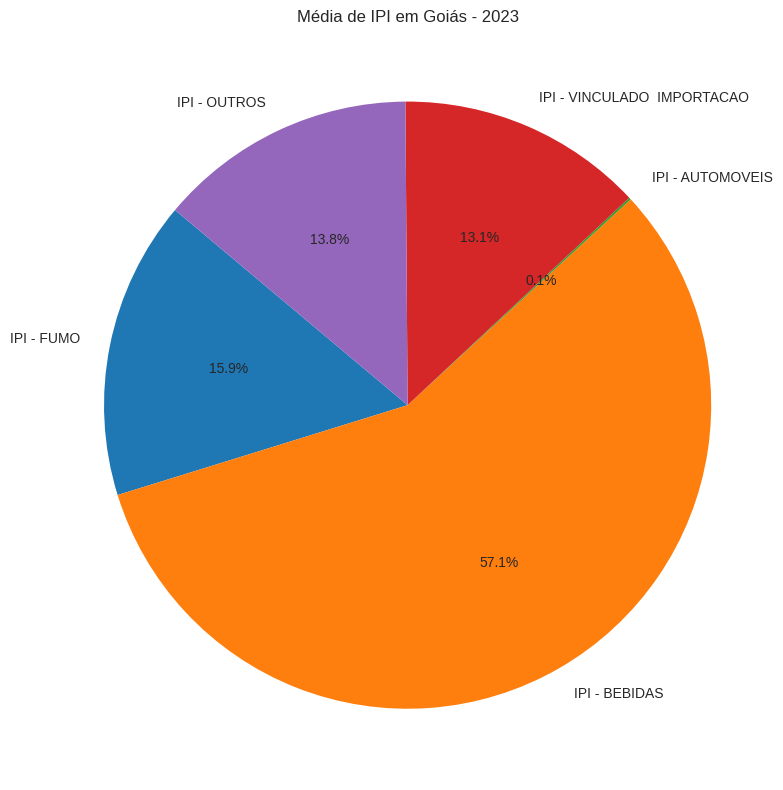

In [360]:
# Criando um gráfico de rosca para visualizar as médias
plt.figure(figsize=(8, 8))
plt.pie(media_ipi_go_2023, labels=media_ipi_go_2023.index, autopct='%1.1f%%', startangle=140)
plt.title('Média de IPI em Goiás - 2023')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.tight_layout()
plt.show()

# **Fim**